# **GRU Exercise**

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [2]:
df = pd.read_csv('/content/traffic.csv')

In [4]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Data Exploration



In [3]:
data = df[['Vehicles']]

In [4]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

## Feature Engineering (if needed)



## Exploratory Data Analysis


In [5]:
# Create sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [6]:
# Define and Create the sequences
seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

In [7]:
# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

## split into train and test sets

In [8]:
# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [10]:
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')

## Fitting The Model



In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 54s 90ms/step - loss: 6.4109e-04 - val_loss: 8.1159e-04
Epoch 2/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 56s 93ms/step - loss: 6.1583e-04 - val_loss: 7.9344e-04
Epoch 3/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 79s 89ms/step - loss: 5.6820e-04 - val_loss: 8.1729e-04
Epoch 4/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 54s 90ms/step - loss: 5.6615e-04 - val_loss: 7.5297e-04
Epoch 5/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - loss: 5.8605e-04 - val_loss: 7.7124e-04
Epoch 6/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - loss: 5.2771e-04 - val_loss: 7.4082e-04
Epoch 7/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - loss: 5.6233e-04 - val_loss: 7.4189e-04
Epoch 8/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 84s 93ms/step - loss: 5.1146e-04 - val_loss: 7.7829e-04
Epoch 9/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - loss: 4.9447e-04 - val_loss: 7.7988e-04
Epoch 10/10
601/601 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - loss: 5.3969e-04 - val_loss: 7.4457e-04


## Make preductuion and evaluatuin matrix.

In [15]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


## Visualize the result

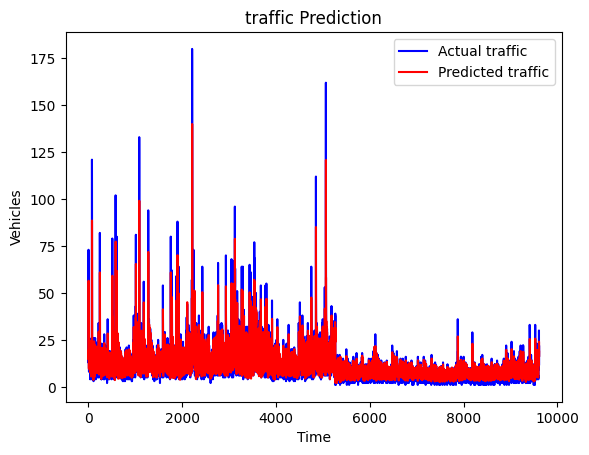

In [16]:
plt.plot(y_test_actual, color='blue', label='Actual traffic')
plt.plot(predicted_stock_price, color='red', label='Predicted traffic')
plt.title('traffic Prediction')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.show()

# **Well done** :)